In [1]:
import sagemaker
import boto3

import numpy as np

from sagemaker.tensorflow import TensorFlowModel


In [2]:
profile_name = 'crayon-site'
boto_session = boto3.Session(profile_name=profile_name) # specify your local aws profile
sagemaker_session = sagemaker.Session(boto_session)
SAGEMAKER_ROLE = "AmazonSageMaker-ExecutionRole-20200714T182988"

In [3]:
!aws s3 cp s3://st-crayon-dev/tf-outputs/resnet50-acrlg-224x224-896x896-random-6-2020-09-02-19-28-08-000/output/model.tar.gz .

download: s3://st-crayon-dev/tf-outputs/resnet50-acrlg-224x224-896x896-random-6-2020-09-02-19-28-08-000/output/model.tar.gz to ./model.tar.gz


In [4]:
!tar -zxf model.tar.gz

In [5]:
!saved_model_cli show --dir model/1/ --all

2020-09-14 16:11:12.394530: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.1/lib64
2020-09-14 16:11:12.394592: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.1/lib64
2020-09-14 16:11:12.394601: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The g

In [11]:
!tar -cvzf model_and_code.tar.gz code --directory=model 1

code/
code/inference.py
code/requirements.txt
1/
1/saved_model.pb
1/assets/
1/variables/
1/variables/variables.data-00000-of-00002
1/variables/variables.data-00001-of-00002
1/variables/variables.index


In [12]:
!aws s3 cp model_and_code.tar.gz s3://st-crayon-dev/cli/inference/model/model_and_code.tar.gz

upload: ./model_and_code.tar.gz to s3://st-crayon-dev/cli/inference/model/model_and_code.tar.gz


In [13]:
model_data = "s3://st-crayon-dev/cli/inference/model/model_and_code.tar.gz"
model = TensorFlowModel(
    sagemaker_session=sagemaker_session,
    model_data=model_data,
    role=SAGEMAKER_ROLE,
    framework_version="2.1",
)

In [14]:
transformer = model.transformer(
    instance_count=2,
    instance_type="ml.p2.2xlarge",
    max_concurrent_transforms=64,
    max_payload=1,
    output_path="s3://st-crayon-dev/cli/inference/output_crops",
)

In [33]:
transformer.transform(
    "s3://st-crayon-dev/cli/inference/input_crops",
    content_type="application/x-image",
)

.............................INFO:__main__:starting services
INFO:__main__:using default model name: model
INFO:__main__:tensorflow serving model config: 
model_config_list: {
  config: {
    name: "model",
    base_path: "/opt/ml/model",
    model_platform: "tensorflow"
  }
}


INFO:__main__:nginx config: 
load_module modules/ngx_http_js_module.so;

worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr error;

worker_rlimit_nofile 4096;

events {
  worker_connections 2048;
}

http {
  include /etc/nginx/mime.types;
  default_type application/json;
  access_log /dev/stdout combined;
  js_include tensorflow-serving.js;

  upstream tfs_upstream {
    server localhost:10001;
  }

  upstream gunicorn_upstream {
    server unix:/tmp/gunicorn.sock fail_timeout=1;
  }

  server {
    listen 8080 deferred;
    client_max_body_size 0;
    client_body_buffer_size 100m;
    subrequest_output_buffer_size 100m;

    set $tfs_version 2.1.1;
    set $default_tfs_model model;



169.254.255.130 - - [15/Sep/2020:00:38:47 +0000] "POST /invocations HTTP/1.1" 200 2665238 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:38:47 +0000] "POST /invocations HTTP/1.1" 200 2750614 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:38:47 +0000] "POST /invocations HTTP/1.1" 200 2665238 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:38:47 +0000] "POST /invocations HTTP/1.1" 200 2750614 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:38:47 +0000] "POST /invocations HTTP/1.1" 200 2665238 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:38:47 +0000] "POST /invocations HTTP/1.1" 200 2665238 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:38:47 +0000] "POST /invocations HTTP/1.1" 200 2934920 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:38:47 +0000] "POST /invocations HTTP/1.1" 200 2665238 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:38:47 +0000] "POST /invocations HTTP/1.1" 20

169.254.255.130 - - [15/Sep/2020:00:38:50 +0000] "POST /invocations HTTP/1.1" 200 2665103 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:38:50 +0000] "POST /invocations HTTP/1.1" 200 3549237 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:38:50 +0000] "POST /invocations HTTP/1.1" 200 2798774 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:38:50 +0000] "POST /invocations HTTP/1.1" 200 2665103 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:38:50 +0000] "POST /invocations HTTP/1.1" 200 2665103 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:38:51 +0000] "POST /invocations HTTP/1.1" 200 2665103 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:38:51 +0000] "POST /invocations HTTP/1.1" 200 2665022 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:38:51 +0000] "POST /invocations HTTP/1.1" 200 2681402 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:38:51 +0000] "POST /invocations HTTP/1.1" 20

169.254.255.130 - - [15/Sep/2020:00:39:02 +0000] "POST /invocations HTTP/1.1" 200 3854701 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:02 +0000] "POST /invocations HTTP/1.1" 200 4671956 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:02 +0000] "POST /invocations HTTP/1.1" 200 4646324 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:02 +0000] "POST /invocations HTTP/1.1" 200 2653416 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:02 +0000] "POST /invocations HTTP/1.1" 200 3019468 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:02 +0000] "POST /invocations HTTP/1.1" 200 4631092 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:02 +0000] "POST /invocations HTTP/1.1" 200 4634218 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:02 +0000] "POST /invocations HTTP/1.1" 200 4574559 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:02 +0000] "POST /invocations HTTP/1.1" 20

169.254.255.130 - - [15/Sep/2020:00:39:12 +0000] "POST /invocations HTTP/1.1" 200 4407490 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:12 +0000] "POST /invocations HTTP/1.1" 200 4453330 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:12 +0000] "POST /invocations HTTP/1.1" 200 4407490 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:12 +0000] "POST /invocations HTTP/1.1" 200 4453330 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:12 +0000] "POST /invocations HTTP/1.1" 200 4577522 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:12 +0000] "POST /invocations HTTP/1.1" 200 4394552 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:12 +0000] "POST /invocations HTTP/1.1" 200 4564596 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:12 +0000] "POST /invocations HTTP/1.1" 200 4404311 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:12 +0000] "POST /invocations HTTP/1.1" 20

169.254.255.130 - - [15/Sep/2020:00:39:28 +0000] "POST /invocations HTTP/1.1" 200 4237492 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:28 +0000] "POST /invocations HTTP/1.1" 200 4590414 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:28 +0000] "POST /invocations HTTP/1.1" 200 4484639 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:28 +0000] "POST /invocations HTTP/1.1" 200 4568357 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:28 +0000] "POST /invocations HTTP/1.1" 200 4489120 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:28 +0000] "POST /invocations HTTP/1.1" 200 4488735 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:28 +0000] "POST /invocations HTTP/1.1" 200 4640849 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:28 +0000] "POST /invocations HTTP/1.1" 200 4613506 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:28 +0000] "POST /invocations HTTP/1.1" 20

169.254.255.130 - - [15/Sep/2020:00:39:38 +0000] "POST /invocations HTTP/1.1" 200 4545815 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:38 +0000] "POST /invocations HTTP/1.1" 200 4545815 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:39 +0000] "POST /invocations HTTP/1.1" 200 4589784 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:39 +0000] "POST /invocations HTTP/1.1" 200 4482605 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:39 +0000] "POST /invocations HTTP/1.1" 200 4612603 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:39 +0000] "POST /invocations HTTP/1.1" 200 4560051 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:39 +0000] "POST /invocations HTTP/1.1" 200 4621069 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:39 +0000] "POST /invocations HTTP/1.1" 200 4499677 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:39 +0000] "POST /invocations HTTP/1.1" 20

169.254.255.130 - - [15/Sep/2020:00:39:49 +0000] "POST /invocations HTTP/1.1" 200 4568880 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:50 +0000] "POST /invocations HTTP/1.1" 200 4645409 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:50 +0000] "POST /invocations HTTP/1.1" 200 4631673 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:50 +0000] "POST /invocations HTTP/1.1" 200 4627091 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:50 +0000] "POST /invocations HTTP/1.1" 200 4604680 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:50 +0000] "POST /invocations HTTP/1.1" 200 4499946 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:50 +0000] "POST /invocations HTTP/1.1" 200 4615096 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:50 +0000] "POST /invocations HTTP/1.1" 200 4480903 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:39:50 +0000] "POST /invocations HTTP/1.1" 20

169.254.255.130 - - [15/Sep/2020:00:40:00 +0000] "POST /invocations HTTP/1.1" 200 4603771 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:40:00 +0000] "POST /invocations HTTP/1.1" 200 4577451 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:40:00 +0000] "POST /invocations HTTP/1.1" 200 4488204 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:40:01 +0000] "POST /invocations HTTP/1.1" 200 4445402 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:40:01 +0000] "POST /invocations HTTP/1.1" 200 4472188 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:40:01 +0000] "POST /invocations HTTP/1.1" 200 4641485 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:40:01 +0000] "POST /invocations HTTP/1.1" 200 4488962 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:40:01 +0000] "POST /invocations HTTP/1.1" 200 4551254 "-" "Go-http-client/1.1"
169.254.255.130 - - [15/Sep/2020:00:40:01 +0000] "POST /invocations HTTP/1.1" 20

In [23]:
import json

In [24]:
with open("/home/tailaiw/Desktop/crop_0000000x0008682.png.out", "r") as f:
    out = json.load(f)

In [26]:
out = np.array(out["predictions"][0])

In [31]:
import matplotlib.pyplot as plt

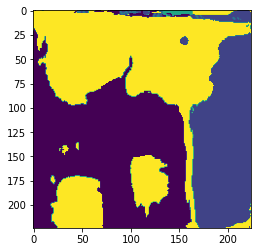

In [32]:
plt.imshow(np.argmax(out, axis=-1).astype(np.uint8))